<a href="https://colab.research.google.com/github/NipunaCoder97/248379V_Thennakoon_RWTMNCB_Assignment/blob/main/248379V_Thennakoon_RWTMNCB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Objective**

Design and train a GAN on the MNIST data set so that Generator G is capable of creating random fake digit images which are indistinguishable from the real digit images in the data set. The key steps are divided as below.


1.   Generative Adversarial Network (GAN) for MNIST
2.   Create and annotate a fake data set

1.   Evaluate the new fake data set






### **1. Generative Adversarial Network (GAN) for MNIST**
**1.1 Import neccessary libraries**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
from PIL import Image
from torchvision import utils as vutils

**1.2 Define generator and discriminator models**

1.   Generator class inheriting from nn.Module that construct neural network using ReLU & Tanh activations.
2.   Discriminator neural network has input layer, three hidden and output layers in NN. It uses ReLu and Sigmoid activations.



In [ ]:
#Generator
class Generator(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Generator, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(True),
            nn.Linear(256, 512),
            nn.ReLU(True),
            nn.Linear(512, 1024),
            nn.ReLU(True),
            nn.Linear(1024, output_dim),
            nn.Tanh()
        )

    def forward(self, x):
        return self.net(x)


#Discriminator
class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)


**1.3 Loading MNIST dataset and transforming**

*   MNIST dataset is downloaded and saved in the drive according to the given root.


*   The required transformations for dataset are applied here.







In [ ]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')

# Define the root directory for the dataset
root = '/content/drive/My Drive/AML_Assignment_GAN/MNIST'

# Transformation for the dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load the MNIST dataset
mnist = datasets.MNIST(root=root, train=True, download=True, transform=transform)

# Create a DataLoader for the MNIST
dataloader = torch.utils.data.DataLoader(mnist, batch_size=64, shuffle=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**1.4 Initialize models and optimizers**

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define the input and output dimensions for the Generator
input_dim = 100 # Dimension of the input noise vector
output_dim = 784 # Dimension of the generated MNIST images (28 x 28 = 784)

# Initialize Generator and Discriminator models and move them to the appropriate device
netG = Generator(input_dim, output_dim).to(device) # Pass input and output dimensions to Generator constructor
netD = Discriminator(output_dim).to(device) # Pass input dimension to Discriminator constructor

# Define the loss criterion (Binary Cross Entropy Loss)
criterion = nn.BCELoss()

# Define optimizers for the Discriminator and Generator
optimizerD = optim.Adam(netD.parameters(), lr=0.0002)
optimizerG = optim.Adam(netG.parameters(), lr=0.0002)


**1.5 Training the GAN**

Epoch [1/25] Batch 0/938 Loss D: 1.3936136960983276, loss G: 0.6892924904823303 D(x): 0.4979231059551239, D(G(z)): 0.5013936758041382 / 0.5019353628158569
Epoch [1/25] Batch 100/938 Loss D: 0.7895264029502869, loss G: 1.2162036895751953 D(x): 0.9862239360809326, D(G(z)): 0.5289881229400635 / 0.3053196668624878
Epoch [1/25] Batch 200/938 Loss D: 1.4038182497024536, loss G: 1.3548341989517212 D(x): 0.7961253523826599, D(G(z)): 0.321638822555542 / 0.2751219868659973
Epoch [1/25] Batch 300/938 Loss D: 0.3899005949497223, loss G: 3.5699734687805176 D(x): 0.9533737897872925, D(G(z)): 0.2390010505914688 / 0.04729529470205307
Epoch [1/25] Batch 400/938 Loss D: 0.4388895034790039, loss G: 3.3927881717681885 D(x): 0.8217507600784302, D(G(z)): 0.1564290076494217 / 0.05893564596772194
Epoch [1/25] Batch 500/938 Loss D: 0.42639267444610596, loss G: 6.294706344604492 D(x): 0.9435583353042603, D(G(z)): 0.24666647613048553 / 0.015072177164256573
Epoch [1/25] Batch 600/938 Loss D: 0.13885478675365448, 

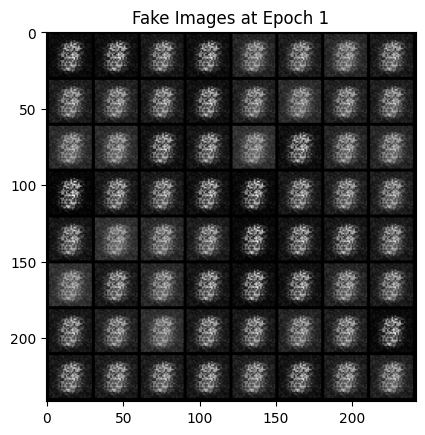

Epoch [2/25] Batch 0/938 Loss D: 0.7029682397842407, loss G: 1.5810800790786743 D(x): 0.7286862134933472, D(G(z)): 0.298237681388855 / 0.22355841100215912
Epoch [2/25] Batch 100/938 Loss D: 1.280239462852478, loss G: 0.8966826796531677 D(x): 0.6411150693893433, D(G(z)): 0.5185937285423279 / 0.445160448551178
Epoch [2/25] Batch 200/938 Loss D: 1.0333532094955444, loss G: 0.8947863578796387 D(x): 0.7529857158660889, D(G(z)): 0.44457435607910156 / 0.4458099603652954
Epoch [2/25] Batch 300/938 Loss D: 0.9781205654144287, loss G: 1.4126614332199097 D(x): 0.6918671131134033, D(G(z)): 0.36913001537323 / 0.3132704198360443
Epoch [2/25] Batch 400/938 Loss D: 1.6315867900848389, loss G: 2.307095527648926 D(x): 0.600947380065918, D(G(z)): 0.4178307056427002 / 0.16928128898143768
Epoch [2/25] Batch 500/938 Loss D: 1.2439966201782227, loss G: 1.897153615951538 D(x): 0.5202223062515259, D(G(z)): 0.3106226623058319 / 0.223812535405159
Epoch [2/25] Batch 600/938 Loss D: 1.775545597076416, loss G: 0.48

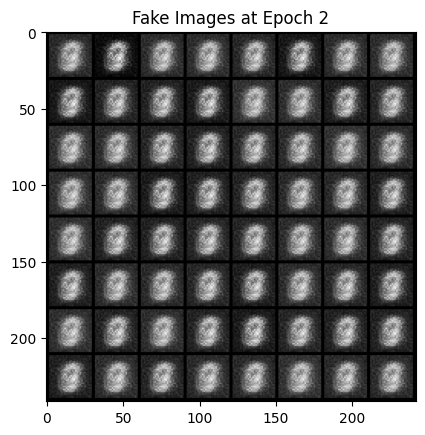

Epoch [3/25] Batch 0/938 Loss D: 1.1002362966537476, loss G: 1.6566601991653442 D(x): 0.7344930171966553, D(G(z)): 0.30917733907699585 / 0.2551385164260864
Epoch [3/25] Batch 100/938 Loss D: 1.1682944297790527, loss G: 1.3639936447143555 D(x): 0.7637543082237244, D(G(z)): 0.4425133466720581 / 0.2811311185359955
Epoch [3/25] Batch 200/938 Loss D: 0.22600358724594116, loss G: 4.625199794769287 D(x): 0.9222841858863831, D(G(z)): 0.10260012000799179 / 0.021160442382097244
Epoch [3/25] Batch 300/938 Loss D: 0.3352409601211548, loss G: 3.06154203414917 D(x): 0.8741815686225891, D(G(z)): 0.14116942882537842 / 0.06785573810338974
Epoch [3/25] Batch 400/938 Loss D: 0.40708115696907043, loss G: 3.0376904010772705 D(x): 0.9018610119819641, D(G(z)): 0.13032160699367523 / 0.08194434642791748
Epoch [3/25] Batch 500/938 Loss D: 0.881989598274231, loss G: 1.2029646635055542 D(x): 0.8220400810241699, D(G(z)): 0.3547895550727844 / 0.32268816232681274
Epoch [3/25] Batch 600/938 Loss D: 0.2504213452339172

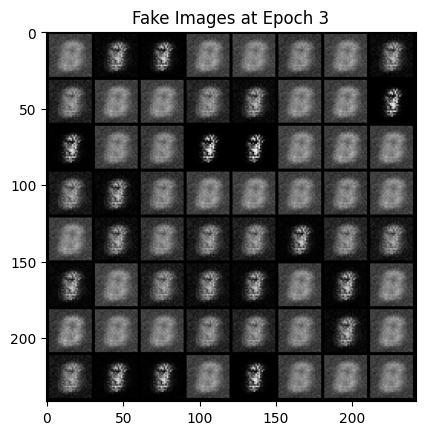

Epoch [4/25] Batch 0/938 Loss D: 0.28526297211647034, loss G: 2.8164727687835693 D(x): 0.9271283149719238, D(G(z)): 0.12911489605903625 / 0.09679608047008514
Epoch [4/25] Batch 100/938 Loss D: 0.8111323118209839, loss G: 1.9789729118347168 D(x): 0.8186751008033752, D(G(z)): 0.2675100266933441 / 0.20590390264987946
Epoch [4/25] Batch 200/938 Loss D: 0.3312956988811493, loss G: 2.860926866531372 D(x): 0.8835090398788452, D(G(z)): 0.11955489963293076 / 0.11427226662635803
Epoch [4/25] Batch 300/938 Loss D: 0.2588975727558136, loss G: 4.433248519897461 D(x): 0.9171542525291443, D(G(z)): 0.05371842160820961 / 0.031771887093782425
Epoch [4/25] Batch 400/938 Loss D: 0.10630498826503754, loss G: 3.7851195335388184 D(x): 0.9613353610038757, D(G(z)): 0.044302552938461304 / 0.037355151027441025
Epoch [4/25] Batch 500/938 Loss D: 0.10987801849842072, loss G: 3.4547078609466553 D(x): 0.9627540111541748, D(G(z)): 0.05834357440471649 / 0.05353535711765289
Epoch [4/25] Batch 600/938 Loss D: 0.18121881

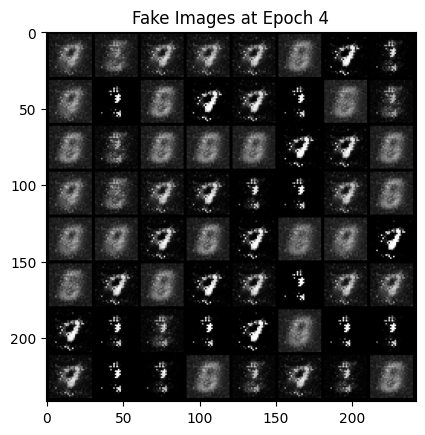

Epoch [5/25] Batch 0/938 Loss D: 0.2895078659057617, loss G: 4.024834632873535 D(x): 0.9016797542572021, D(G(z)): 0.0908849760890007 / 0.03727614879608154
Epoch [5/25] Batch 100/938 Loss D: 0.19065114855766296, loss G: 3.3120999336242676 D(x): 0.967246949672699, D(G(z)): 0.10269320756196976 / 0.06173964589834213
Epoch [5/25] Batch 200/938 Loss D: 0.33262544870376587, loss G: 4.930611610412598 D(x): 0.9006258845329285, D(G(z)): 0.060458071529865265 / 0.023307304829359055
Epoch [5/25] Batch 300/938 Loss D: 0.2929157316684723, loss G: 3.4852941036224365 D(x): 0.9253121614456177, D(G(z)): 0.09611949324607849 / 0.06252262741327286
Epoch [5/25] Batch 400/938 Loss D: 0.1961580514907837, loss G: 3.5457763671875 D(x): 0.9491791129112244, D(G(z)): 0.09310808777809143 / 0.05777394771575928
Epoch [5/25] Batch 500/938 Loss D: 0.19947576522827148, loss G: 3.892667531967163 D(x): 0.9588241577148438, D(G(z)): 0.08412733674049377 / 0.06806832551956177
Epoch [5/25] Batch 600/938 Loss D: 0.30058708786964

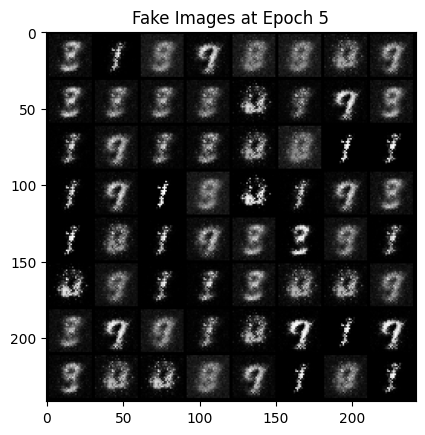

Epoch [6/25] Batch 0/938 Loss D: 0.4984559714794159, loss G: 3.3886313438415527 D(x): 0.8111839890480042, D(G(z)): 0.10428068786859512 / 0.07865020632743835
Epoch [6/25] Batch 100/938 Loss D: 0.39523422718048096, loss G: 3.350621223449707 D(x): 0.8970862030982971, D(G(z)): 0.1235240250825882 / 0.06272123754024506
Epoch [6/25] Batch 200/938 Loss D: 0.46191132068634033, loss G: 2.6316065788269043 D(x): 0.855021059513092, D(G(z)): 0.12981697916984558 / 0.13020096719264984
Epoch [6/25] Batch 300/938 Loss D: 0.3817514181137085, loss G: 3.077361822128296 D(x): 0.9050021767616272, D(G(z)): 0.0720352828502655 / 0.09306435286998749
Epoch [6/25] Batch 400/938 Loss D: 0.30326542258262634, loss G: 4.213395118713379 D(x): 0.9172216057777405, D(G(z)): 0.05765042081475258 / 0.053623080253601074
Epoch [6/25] Batch 500/938 Loss D: 0.4593583643436432, loss G: 2.8191347122192383 D(x): 0.920516312122345, D(G(z)): 0.2098187357187271 / 0.10669628530740738
Epoch [6/25] Batch 600/938 Loss D: 0.375909447669982

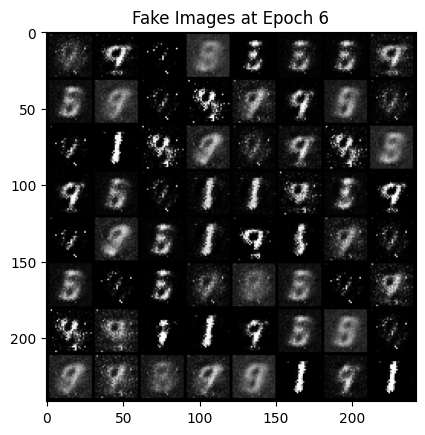

Epoch [7/25] Batch 0/938 Loss D: 0.38163796067237854, loss G: 2.4696240425109863 D(x): 0.8474972248077393, D(G(z)): 0.07484882324934006 / 0.14307820796966553
Epoch [7/25] Batch 100/938 Loss D: 0.28505265712738037, loss G: 3.6744766235351562 D(x): 0.8900512456893921, D(G(z)): 0.06925109028816223 / 0.0538971833884716
Epoch [7/25] Batch 200/938 Loss D: 0.33183348178863525, loss G: 3.2901391983032227 D(x): 0.8515887260437012, D(G(z)): 0.05173775553703308 / 0.08534498512744904
Epoch [7/25] Batch 300/938 Loss D: 0.4031819701194763, loss G: 2.6819186210632324 D(x): 0.9242595434188843, D(G(z)): 0.18463756144046783 / 0.1399087905883789
Epoch [7/25] Batch 400/938 Loss D: 0.20972874760627747, loss G: 3.60198712348938 D(x): 0.9615864157676697, D(G(z)): 0.11688690632581711 / 0.07569695264101028
Epoch [7/25] Batch 500/938 Loss D: 0.48971253633499146, loss G: 3.476503849029541 D(x): 0.8392722606658936, D(G(z)): 0.079923614859581 / 0.07069984823465347
Epoch [7/25] Batch 600/938 Loss D: 0.5673574209213

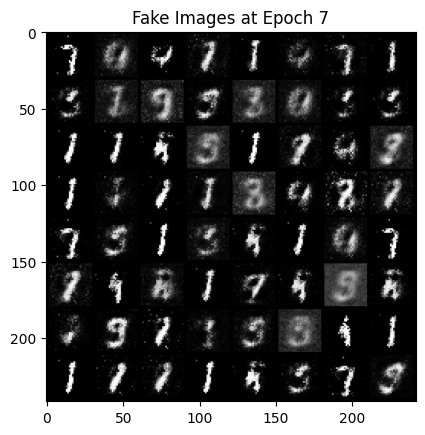

Epoch [8/25] Batch 0/938 Loss D: 0.3968149721622467, loss G: 2.6690292358398438 D(x): 0.8882095813751221, D(G(z)): 0.11836281418800354 / 0.1430126428604126
Epoch [8/25] Batch 100/938 Loss D: 0.42186087369918823, loss G: 2.725806713104248 D(x): 0.8516820669174194, D(G(z)): 0.08447900414466858 / 0.1427348256111145
Epoch [8/25] Batch 200/938 Loss D: 0.37195372581481934, loss G: 2.9615893363952637 D(x): 0.920897901058197, D(G(z)): 0.12164349853992462 / 0.12508298456668854
Epoch [8/25] Batch 300/938 Loss D: 0.7289711236953735, loss G: 3.217057466506958 D(x): 0.8502790927886963, D(G(z)): 0.1927230954170227 / 0.0868784710764885
Epoch [8/25] Batch 400/938 Loss D: 0.5171489715576172, loss G: 2.410637378692627 D(x): 0.9093587398529053, D(G(z)): 0.23470067977905273 / 0.14549514651298523
Epoch [8/25] Batch 500/938 Loss D: 0.33227795362472534, loss G: 3.5223207473754883 D(x): 0.9322705864906311, D(G(z)): 0.12676936388015747 / 0.05366933345794678
Epoch [8/25] Batch 600/938 Loss D: 0.5092380046844482

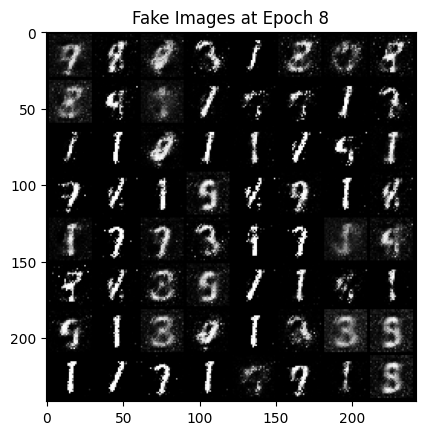

Epoch [9/25] Batch 0/938 Loss D: 0.5370460748672485, loss G: 3.1701247692108154 D(x): 0.8681591749191284, D(G(z)): 0.1703137904405594 / 0.09096017479896545
Epoch [9/25] Batch 100/938 Loss D: 0.4607469439506531, loss G: 2.7242109775543213 D(x): 0.8077788352966309, D(G(z)): 0.08522797375917435 / 0.1073731929063797
Epoch [9/25] Batch 200/938 Loss D: 0.28335440158843994, loss G: 2.9227418899536133 D(x): 0.9122906923294067, D(G(z)): 0.09741047769784927 / 0.11941123753786087
Epoch [9/25] Batch 300/938 Loss D: 0.23695537447929382, loss G: 2.9779179096221924 D(x): 0.9623289704322815, D(G(z)): 0.14939391613006592 / 0.08836348354816437
Epoch [9/25] Batch 400/938 Loss D: 0.37760013341903687, loss G: 4.187385559082031 D(x): 0.89979088306427, D(G(z)): 0.06844231486320496 / 0.05022352561354637
Epoch [9/25] Batch 500/938 Loss D: 0.42348772287368774, loss G: 2.6845598220825195 D(x): 0.8463197946548462, D(G(z)): 0.10288424789905548 / 0.10298384726047516
Epoch [9/25] Batch 600/938 Loss D: 0.331817358732

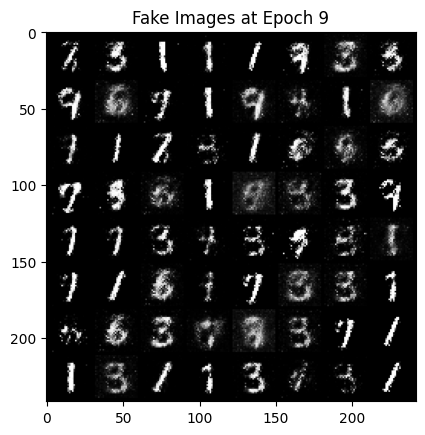

Epoch [10/25] Batch 0/938 Loss D: 0.44447025656700134, loss G: 2.407869577407837 D(x): 0.8242177963256836, D(G(z)): 0.11844710260629654 / 0.12589964270591736
Epoch [10/25] Batch 100/938 Loss D: 0.40244632959365845, loss G: 3.0928077697753906 D(x): 0.8219470977783203, D(G(z)): 0.09137974679470062 / 0.10100901871919632
Epoch [10/25] Batch 200/938 Loss D: 0.677915632724762, loss G: 2.1237053871154785 D(x): 0.7916445136070251, D(G(z)): 0.20680804550647736 / 0.18610556423664093
Epoch [10/25] Batch 300/938 Loss D: 0.732964038848877, loss G: 2.093773603439331 D(x): 0.811935544013977, D(G(z)): 0.23816852271556854 / 0.1590997725725174
Epoch [10/25] Batch 400/938 Loss D: 0.6298549175262451, loss G: 2.460812568664551 D(x): 0.7979216575622559, D(G(z)): 0.19785483181476593 / 0.1285191774368286
Epoch [10/25] Batch 500/938 Loss D: 0.45229578018188477, loss G: 2.371821880340576 D(x): 0.8435950875282288, D(G(z)): 0.15064387023448944 / 0.13919512927532196
Epoch [10/25] Batch 600/938 Loss D: 0.3812440633

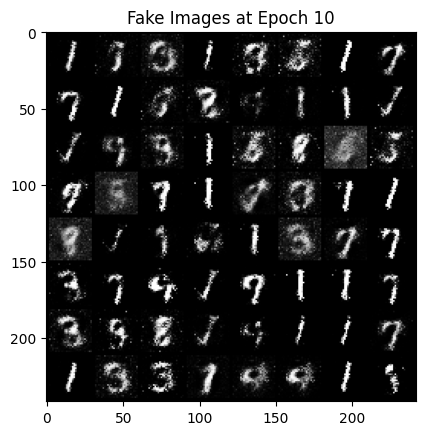

Epoch [11/25] Batch 0/938 Loss D: 0.31562340259552, loss G: 2.165229082107544 D(x): 0.9071128964424133, D(G(z)): 0.1615651249885559 / 0.16320113837718964
Epoch [11/25] Batch 100/938 Loss D: 0.531810462474823, loss G: 2.6446430683135986 D(x): 0.8509725332260132, D(G(z)): 0.1878652423620224 / 0.13569313287734985
Epoch [11/25] Batch 200/938 Loss D: 0.8027212023735046, loss G: 2.7443089485168457 D(x): 0.7451403141021729, D(G(z)): 0.14505696296691895 / 0.11453601717948914
Epoch [11/25] Batch 300/938 Loss D: 0.5573911070823669, loss G: 2.3986546993255615 D(x): 0.8618406653404236, D(G(z)): 0.1750417947769165 / 0.15067747235298157
Epoch [11/25] Batch 400/938 Loss D: 0.5973100662231445, loss G: 2.1415257453918457 D(x): 0.8656848669052124, D(G(z)): 0.23646527528762817 / 0.1702766716480255
Epoch [11/25] Batch 500/938 Loss D: 0.7779107689857483, loss G: 2.1187167167663574 D(x): 0.7972102165222168, D(G(z)): 0.21241718530654907 / 0.22278626263141632
Epoch [11/25] Batch 600/938 Loss D: 0.694259047508

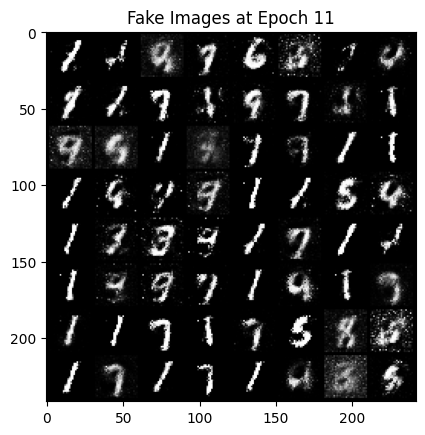

Epoch [12/25] Batch 0/938 Loss D: 0.9553141593933105, loss G: 2.2576632499694824 D(x): 0.6171153783798218, D(G(z)): 0.13311275839805603 / 0.14138063788414001
Epoch [12/25] Batch 100/938 Loss D: 0.6445915699005127, loss G: 1.7567188739776611 D(x): 0.7740877270698547, D(G(z)): 0.2071332037448883 / 0.21428649127483368
Epoch [12/25] Batch 200/938 Loss D: 0.4726940393447876, loss G: 2.274038791656494 D(x): 0.8311614990234375, D(G(z)): 0.15597058832645416 / 0.1514098346233368
Epoch [12/25] Batch 300/938 Loss D: 0.5142079591751099, loss G: 2.335747718811035 D(x): 0.8484348654747009, D(G(z)): 0.20124483108520508 / 0.1494823396205902
Epoch [12/25] Batch 400/938 Loss D: 0.5262472033500671, loss G: 2.174130439758301 D(x): 0.794543981552124, D(G(z)): 0.14493806660175323 / 0.18678416311740875
Epoch [12/25] Batch 500/938 Loss D: 0.4611489176750183, loss G: 2.2198567390441895 D(x): 0.9209086894989014, D(G(z)): 0.24491378664970398 / 0.17987945675849915
Epoch [12/25] Batch 600/938 Loss D: 0.94619739055

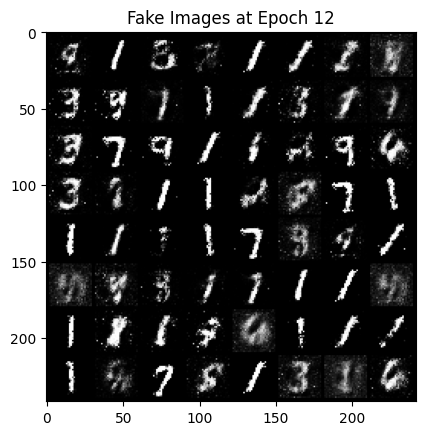

Epoch [13/25] Batch 0/938 Loss D: 0.4255978465080261, loss G: 2.327096939086914 D(x): 0.8846389055252075, D(G(z)): 0.1492607295513153 / 0.16750042140483856
Epoch [13/25] Batch 100/938 Loss D: 0.32152920961380005, loss G: 2.8026485443115234 D(x): 0.8638684749603271, D(G(z)): 0.10313190519809723 / 0.09871353209018707
Epoch [13/25] Batch 200/938 Loss D: 0.7186614274978638, loss G: 1.8469915390014648 D(x): 0.7977352738380432, D(G(z)): 0.2511053681373596 / 0.21486863493919373
Epoch [13/25] Batch 300/938 Loss D: 0.5244917869567871, loss G: 2.227285861968994 D(x): 0.7971764802932739, D(G(z)): 0.15770697593688965 / 0.15716864168643951
Epoch [13/25] Batch 400/938 Loss D: 0.7771695852279663, loss G: 1.6682051420211792 D(x): 0.7676798105239868, D(G(z)): 0.23503413796424866 / 0.2932601571083069
Epoch [13/25] Batch 500/938 Loss D: 0.6551674604415894, loss G: 1.8721098899841309 D(x): 0.8146191835403442, D(G(z)): 0.25167524814605713 / 0.21015165746212006
Epoch [13/25] Batch 600/938 Loss D: 0.38086703

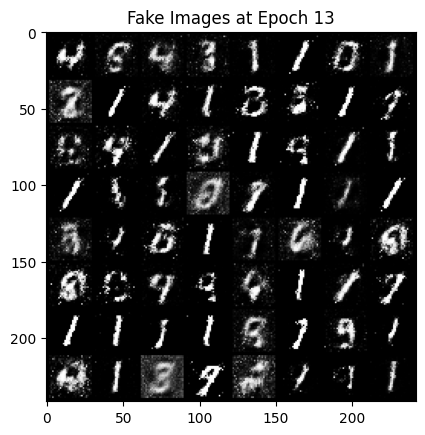

Epoch [14/25] Batch 0/938 Loss D: 0.4980556070804596, loss G: 2.0715341567993164 D(x): 0.8406649827957153, D(G(z)): 0.18919871747493744 / 0.1879243403673172
Epoch [14/25] Batch 100/938 Loss D: 0.5973756909370422, loss G: 2.1395888328552246 D(x): 0.8389541506767273, D(G(z)): 0.24260814487934113 / 0.19827009737491608
Epoch [14/25] Batch 200/938 Loss D: 0.6251140236854553, loss G: 2.1035499572753906 D(x): 0.7854461669921875, D(G(z)): 0.17932407557964325 / 0.18880672752857208
Epoch [14/25] Batch 300/938 Loss D: 0.7821064591407776, loss G: 1.9076602458953857 D(x): 0.8483350276947021, D(G(z)): 0.32205843925476074 / 0.20745986700057983
Epoch [14/25] Batch 400/938 Loss D: 0.6232696771621704, loss G: 1.7214983701705933 D(x): 0.8188762664794922, D(G(z)): 0.25080442428588867 / 0.22085487842559814
Epoch [14/25] Batch 500/938 Loss D: 0.640383243560791, loss G: 1.9898011684417725 D(x): 0.805047869682312, D(G(z)): 0.22582703828811646 / 0.20049600303173065
Epoch [14/25] Batch 600/938 Loss D: 0.6315208

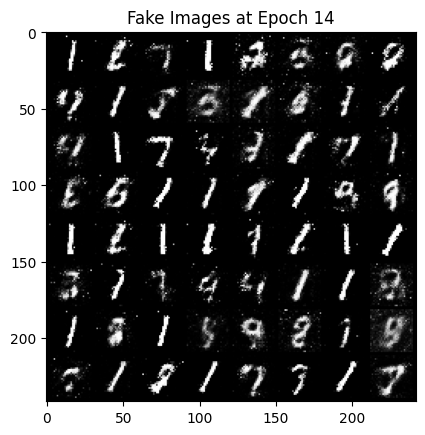

Epoch [15/25] Batch 0/938 Loss D: 0.7053407430648804, loss G: 2.0125324726104736 D(x): 0.6982733011245728, D(G(z)): 0.16269148886203766 / 0.1624097377061844
Epoch [15/25] Batch 100/938 Loss D: 0.5349188446998596, loss G: 2.1720330715179443 D(x): 0.8400595188140869, D(G(z)): 0.2239532321691513 / 0.1647002100944519
Epoch [15/25] Batch 200/938 Loss D: 0.7081215381622314, loss G: 1.9228471517562866 D(x): 0.8121969103813171, D(G(z)): 0.24750135838985443 / 0.243397518992424
Epoch [15/25] Batch 300/938 Loss D: 0.7648074626922607, loss G: 2.209726572036743 D(x): 0.7739543318748474, D(G(z)): 0.23682866990566254 / 0.1572636067867279
Epoch [15/25] Batch 400/938 Loss D: 0.7453972697257996, loss G: 2.3635599613189697 D(x): 0.7174909710884094, D(G(z)): 0.16414906084537506 / 0.12615732848644257
Epoch [15/25] Batch 500/938 Loss D: 0.6033316850662231, loss G: 2.1286113262176514 D(x): 0.8123587965965271, D(G(z)): 0.22116726636886597 / 0.17709481716156006
Epoch [15/25] Batch 600/938 Loss D: 0.74161720275

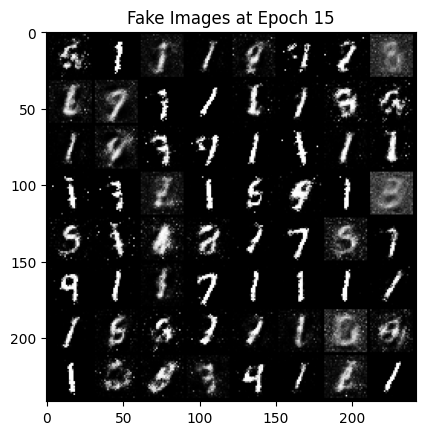

Epoch [16/25] Batch 0/938 Loss D: 0.8385905027389526, loss G: 2.0579745769500732 D(x): 0.7199267745018005, D(G(z)): 0.1939031481742859 / 0.185068741440773
Epoch [16/25] Batch 100/938 Loss D: 0.6597654819488525, loss G: 2.2481257915496826 D(x): 0.7705121040344238, D(G(z)): 0.20525862276554108 / 0.16947484016418457
Epoch [16/25] Batch 200/938 Loss D: 0.9575600624084473, loss G: 1.6239683628082275 D(x): 0.7677493095397949, D(G(z)): 0.3059697449207306 / 0.2563256621360779
Epoch [16/25] Batch 300/938 Loss D: 0.5751389265060425, loss G: 2.103215456008911 D(x): 0.7912988066673279, D(G(z)): 0.19042792916297913 / 0.1633400321006775
Epoch [16/25] Batch 400/938 Loss D: 0.7281602621078491, loss G: 1.551965355873108 D(x): 0.8158038854598999, D(G(z)): 0.28310659527778625 / 0.2969686985015869
Epoch [16/25] Batch 500/938 Loss D: 0.5508067607879639, loss G: 2.089799165725708 D(x): 0.844318151473999, D(G(z)): 0.21445465087890625 / 0.1757012903690338
Epoch [16/25] Batch 600/938 Loss D: 1.070812702178955,

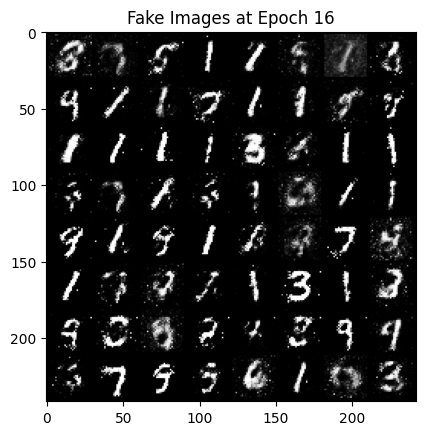

Epoch [17/25] Batch 0/938 Loss D: 0.9089506268501282, loss G: 1.4537837505340576 D(x): 0.7587913870811462, D(G(z)): 0.31957101821899414 / 0.3159428834915161
Epoch [17/25] Batch 100/938 Loss D: 0.7594887018203735, loss G: 1.6525626182556152 D(x): 0.7909584641456604, D(G(z)): 0.2808590829372406 / 0.25661423802375793
Epoch [17/25] Batch 200/938 Loss D: 0.783768892288208, loss G: 1.7746648788452148 D(x): 0.7352595329284668, D(G(z)): 0.22226884961128235 / 0.23903830349445343
Epoch [17/25] Batch 300/938 Loss D: 0.8241268992424011, loss G: 2.2308449745178223 D(x): 0.6685250401496887, D(G(z)): 0.13975191116333008 / 0.18281009793281555
Epoch [17/25] Batch 400/938 Loss D: 0.8548169136047363, loss G: 1.897399663925171 D(x): 0.6968185901641846, D(G(z)): 0.2583341896533966 / 0.20365051925182343
Epoch [17/25] Batch 500/938 Loss D: 0.7380176186561584, loss G: 2.0221104621887207 D(x): 0.7759360671043396, D(G(z)): 0.25789105892181396 / 0.22149494290351868
Epoch [17/25] Batch 600/938 Loss D: 0.628461599

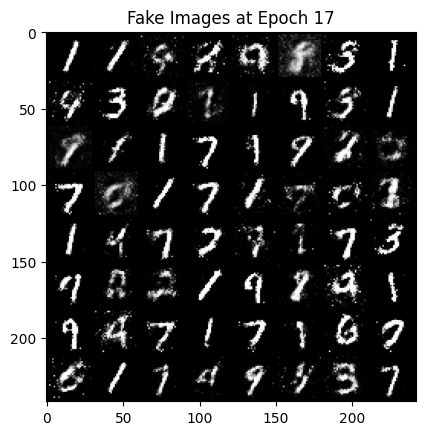

Epoch [18/25] Batch 0/938 Loss D: 1.005605697631836, loss G: 1.4448188543319702 D(x): 0.82411789894104, D(G(z)): 0.4005228281021118 / 0.3492058515548706
Epoch [18/25] Batch 100/938 Loss D: 1.1159658432006836, loss G: 1.3163487911224365 D(x): 0.7006400227546692, D(G(z)): 0.37213456630706787 / 0.33468395471572876
Epoch [18/25] Batch 200/938 Loss D: 0.6345471739768982, loss G: 1.5133228302001953 D(x): 0.8271982073783875, D(G(z)): 0.2997194528579712 / 0.26214858889579773
Epoch [18/25] Batch 300/938 Loss D: 0.5110065340995789, loss G: 1.8164631128311157 D(x): 0.8323480486869812, D(G(z)): 0.2124091535806656 / 0.214370459318161
Epoch [18/25] Batch 400/938 Loss D: 0.6736959218978882, loss G: 1.8785477876663208 D(x): 0.8029553890228271, D(G(z)): 0.23340341448783875 / 0.2064514309167862
Epoch [18/25] Batch 500/938 Loss D: 0.5143840312957764, loss G: 2.154052734375 D(x): 0.8324657082557678, D(G(z)): 0.19532158970832825 / 0.1569487303495407
Epoch [18/25] Batch 600/938 Loss D: 0.5264261960983276, l

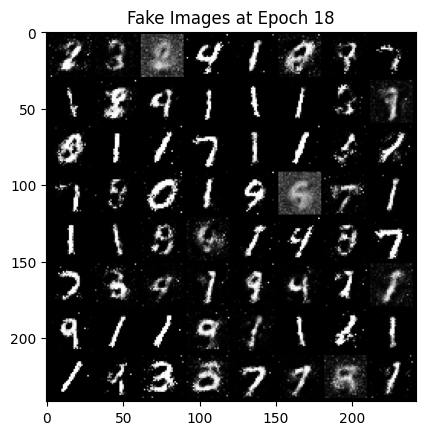

Epoch [19/25] Batch 0/938 Loss D: 1.058241844177246, loss G: 1.8399243354797363 D(x): 0.7047712206840515, D(G(z)): 0.307603657245636 / 0.20323246717453003
Epoch [19/25] Batch 100/938 Loss D: 0.8209563493728638, loss G: 1.5457265377044678 D(x): 0.7720515727996826, D(G(z)): 0.3265070617198944 / 0.2736019194126129
Epoch [19/25] Batch 200/938 Loss D: 0.680919349193573, loss G: 2.3179287910461426 D(x): 0.7217063903808594, D(G(z)): 0.1729559451341629 / 0.15285784006118774
Epoch [19/25] Batch 300/938 Loss D: 0.6916180849075317, loss G: 1.5564203262329102 D(x): 0.7864694595336914, D(G(z)): 0.27486658096313477 / 0.2484033703804016
Epoch [19/25] Batch 400/938 Loss D: 0.681172251701355, loss G: 1.892712950706482 D(x): 0.7106225490570068, D(G(z)): 0.19373071193695068 / 0.20402292907238007
Epoch [19/25] Batch 500/938 Loss D: 0.9892134070396423, loss G: 1.3871914148330688 D(x): 0.6367678642272949, D(G(z)): 0.25904521346092224 / 0.3217182755470276
Epoch [19/25] Batch 600/938 Loss D: 0.823423206806182

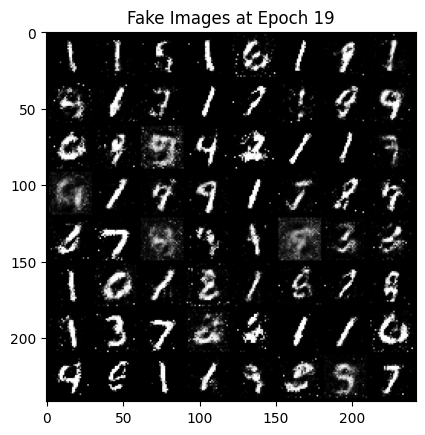

Epoch [20/25] Batch 0/938 Loss D: 1.0039496421813965, loss G: 1.626916766166687 D(x): 0.639143168926239, D(G(z)): 0.27169325947761536 / 0.26983964443206787
Epoch [20/25] Batch 100/938 Loss D: 0.889011025428772, loss G: 1.7368395328521729 D(x): 0.8640332221984863, D(G(z)): 0.3750905692577362 / 0.25734493136405945
Epoch [20/25] Batch 200/938 Loss D: 0.9863319396972656, loss G: 1.4722826480865479 D(x): 0.7459436655044556, D(G(z)): 0.35061004757881165 / 0.28562018275260925
Epoch [20/25] Batch 300/938 Loss D: 0.74596107006073, loss G: 1.459540605545044 D(x): 0.7481284141540527, D(G(z)): 0.2780003547668457 / 0.2876008450984955
Epoch [20/25] Batch 400/938 Loss D: 0.680696964263916, loss G: 1.8393534421920776 D(x): 0.780481219291687, D(G(z)): 0.2592830955982208 / 0.21273672580718994
Epoch [20/25] Batch 500/938 Loss D: 0.524566113948822, loss G: 1.9359629154205322 D(x): 0.8619989156723022, D(G(z)): 0.2488052099943161 / 0.23216021060943604
Epoch [20/25] Batch 600/938 Loss D: 0.7501175403594971, 

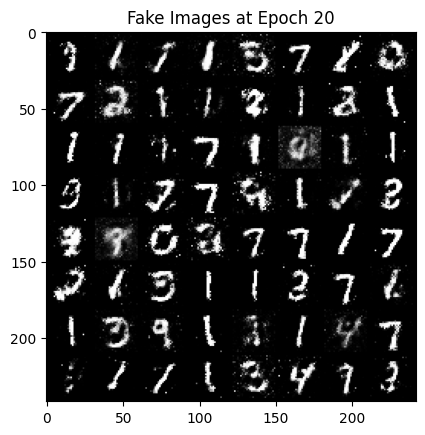

Epoch [21/25] Batch 0/938 Loss D: 0.7222508192062378, loss G: 1.7878844738006592 D(x): 0.7609801292419434, D(G(z)): 0.22587500512599945 / 0.2448144108057022
Epoch [21/25] Batch 100/938 Loss D: 0.7898632287979126, loss G: 1.9926632642745972 D(x): 0.8008405566215515, D(G(z)): 0.312407910823822 / 0.21373292803764343
Epoch [21/25] Batch 200/938 Loss D: 1.0904351472854614, loss G: 1.3973323106765747 D(x): 0.6486090421676636, D(G(z)): 0.3323030471801758 / 0.3251756429672241
Epoch [21/25] Batch 300/938 Loss D: 1.1135168075561523, loss G: 1.2056108713150024 D(x): 0.7219402194023132, D(G(z)): 0.40937602519989014 / 0.3596639633178711
Epoch [21/25] Batch 400/938 Loss D: 1.025451421737671, loss G: 1.1448763608932495 D(x): 0.7197359204292297, D(G(z)): 0.3793688416481018 / 0.37153178453445435
Epoch [21/25] Batch 500/938 Loss D: 0.7440214157104492, loss G: 1.5506380796432495 D(x): 0.7822309136390686, D(G(z)): 0.301046222448349 / 0.2619190812110901
Epoch [21/25] Batch 600/938 Loss D: 0.865054666996002

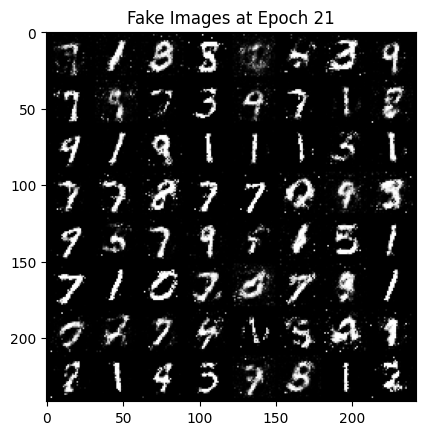

Epoch [22/25] Batch 0/938 Loss D: 0.834358811378479, loss G: 1.7505820989608765 D(x): 0.6820856332778931, D(G(z)): 0.24216389656066895 / 0.22794055938720703
Epoch [22/25] Batch 100/938 Loss D: 0.8365433216094971, loss G: 1.6025376319885254 D(x): 0.7683060169219971, D(G(z)): 0.32454031705856323 / 0.2917807400226593
Epoch [22/25] Batch 200/938 Loss D: 0.7532882690429688, loss G: 1.754041314125061 D(x): 0.8247449398040771, D(G(z)): 0.3398606777191162 / 0.27322128415107727
Epoch [22/25] Batch 300/938 Loss D: 0.9685598015785217, loss G: 1.0871479511260986 D(x): 0.7223950028419495, D(G(z)): 0.38395968079566956 / 0.37983018159866333
Epoch [22/25] Batch 400/938 Loss D: 0.8515456914901733, loss G: 1.5026994943618774 D(x): 0.7103792428970337, D(G(z)): 0.2910178601741791 / 0.2801593244075775
Epoch [22/25] Batch 500/938 Loss D: 0.6414445638656616, loss G: 1.8706287145614624 D(x): 0.7613338232040405, D(G(z)): 0.22354550659656525 / 0.2193087637424469
Epoch [22/25] Batch 600/938 Loss D: 1.01521134376

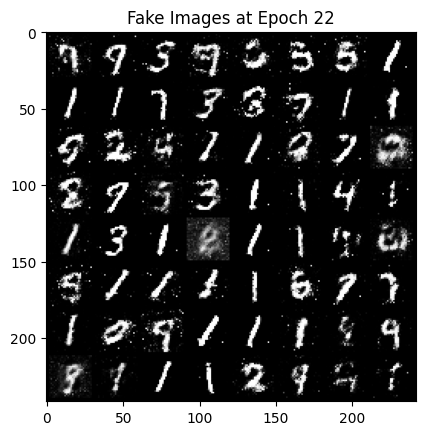

Epoch [23/25] Batch 0/938 Loss D: 1.0511058568954468, loss G: 1.3812336921691895 D(x): 0.6322046518325806, D(G(z)): 0.33455023169517517 / 0.2974599003791809
Epoch [23/25] Batch 100/938 Loss D: 0.8590563535690308, loss G: 1.3521575927734375 D(x): 0.6849830150604248, D(G(z)): 0.2684258818626404 / 0.30665305256843567
Epoch [23/25] Batch 200/938 Loss D: 0.7700667977333069, loss G: 2.1050217151641846 D(x): 0.7282431125640869, D(G(z)): 0.2373361438512802 / 0.18828219175338745
Epoch [23/25] Batch 300/938 Loss D: 1.2626419067382812, loss G: 1.0575532913208008 D(x): 0.7350765466690063, D(G(z)): 0.44510823488235474 / 0.41902580857276917
Epoch [23/25] Batch 400/938 Loss D: 0.7947858572006226, loss G: 1.215113878250122 D(x): 0.7760570049285889, D(G(z)): 0.34709277749061584 / 0.33143091201782227
Epoch [23/25] Batch 500/938 Loss D: 0.6963948011398315, loss G: 1.7555538415908813 D(x): 0.711868405342102, D(G(z)): 0.2186965048313141 / 0.21930688619613647
Epoch [23/25] Batch 600/938 Loss D: 0.7292434573

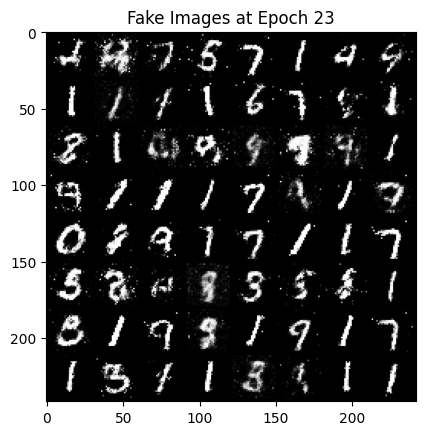

Epoch [24/25] Batch 0/938 Loss D: 0.7035849094390869, loss G: 1.655672311782837 D(x): 0.7706655859947205, D(G(z)): 0.26569050550460815 / 0.2434706687927246
Epoch [24/25] Batch 100/938 Loss D: 1.0428969860076904, loss G: 1.8253276348114014 D(x): 0.6168347001075745, D(G(z)): 0.27065426111221313 / 0.2445807158946991
Epoch [24/25] Batch 200/938 Loss D: 1.1739476919174194, loss G: 1.1664342880249023 D(x): 0.5699716210365295, D(G(z)): 0.31650036573410034 / 0.3713894486427307
Epoch [24/25] Batch 300/938 Loss D: 0.8619818687438965, loss G: 1.3007842302322388 D(x): 0.7757709622383118, D(G(z)): 0.35913801193237305 / 0.34592103958129883
Epoch [24/25] Batch 400/938 Loss D: 1.0246864557266235, loss G: 1.6457542181015015 D(x): 0.5798654556274414, D(G(z)): 0.26610440015792847 / 0.2385808825492859
Epoch [24/25] Batch 500/938 Loss D: 0.8316611647605896, loss G: 1.9420695304870605 D(x): 0.7430357933044434, D(G(z)): 0.2869199514389038 / 0.23057633638381958
Epoch [24/25] Batch 600/938 Loss D: 1.1176233291

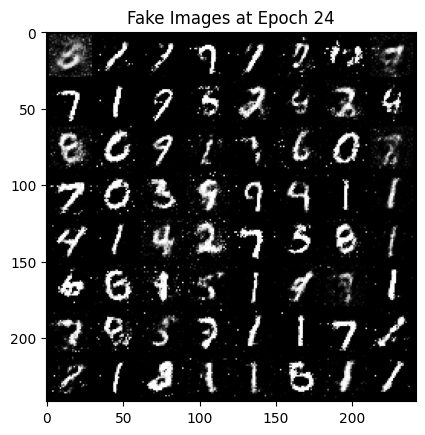

Epoch [25/25] Batch 0/938 Loss D: 0.778891384601593, loss G: 1.735222578048706 D(x): 0.7122073769569397, D(G(z)): 0.252479612827301 / 0.2482900321483612
Epoch [25/25] Batch 100/938 Loss D: 1.0487643480300903, loss G: 1.1737724542617798 D(x): 0.7084912657737732, D(G(z)): 0.3869125247001648 / 0.37747475504875183
Epoch [25/25] Batch 200/938 Loss D: 0.9172605872154236, loss G: 1.7844552993774414 D(x): 0.7005466222763062, D(G(z)): 0.27527880668640137 / 0.22647008299827576
Epoch [25/25] Batch 300/938 Loss D: 0.8352240324020386, loss G: 1.6410300731658936 D(x): 0.7102037072181702, D(G(z)): 0.26831167936325073 / 0.24107854068279266
Epoch [25/25] Batch 400/938 Loss D: 0.6737968921661377, loss G: 1.7097184658050537 D(x): 0.794340968132019, D(G(z)): 0.2705136835575104 / 0.23282426595687866
Epoch [25/25] Batch 500/938 Loss D: 1.0680831670761108, loss G: 1.5918660163879395 D(x): 0.7438518404960632, D(G(z)): 0.35580313205718994 / 0.3370243310928345
Epoch [25/25] Batch 600/938 Loss D: 0.9519926309585

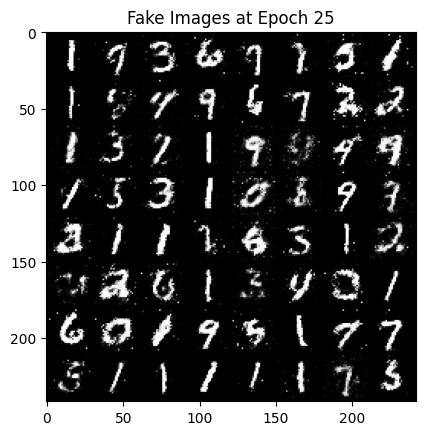

In [ ]:
# Number of epochs for training
num_epochs = 25

# Training loop
for epoch in range(num_epochs):
    for i, (data, _) in enumerate(dataloader):
        # Train Discriminator
        netD.zero_grad()

        # Train with real data
        real = data.view(data.size(0), -1).to(device)
        b_size = real.size(0)

        # Smooth labels for real data
        real_label = torch.full((b_size,),1., device=device)

        output = netD(real).view(-1)
        errD_real = criterion(output, real_label)
        errD_real.backward()
        D_x = output.mean().item()

        # Train with fake data
        noise = torch.randn(b_size, 100, device=device)
        fake = netG(noise)

        # Label for fake data
        fake_label = torch.full((b_size,),0., device=device)

        output = netD(fake.detach()).view(-1)
        errD_fake = criterion(output, fake_label)
        errD_fake.backward()
        D_G_z1 = output.mean().item()

        errD = errD_real + errD_fake
        optimizerD.step()

        # Train Generator
        netG.zero_grad()

        # Update labels for generator training
        real_label.fill_(1)

        output = netD(fake).view(-1)
        errG = criterion(output, real_label)
        errG.backward()
        D_G_z2 = output.mean().item()
        optimizerG.step()

        # Print training progress for D and G
        if i % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}] Batch {i}/{len(dataloader)} '
                  f'Loss D: {errD.item()}, loss G: {errG.item()} '
                  f'D(x): {D_x}, D(G(z)): {D_G_z1} / {D_G_z2}')

    # Save fake images for visualization after every epoch
    with torch.no_grad():
        fake = netG(torch.randn(64, 100, device=device)).view(-1, 1, 28, 28)
        fake_images = vutils.make_grid(fake, padding=2, normalize=True)
        plt.imshow(fake_images.permute(1, 2, 0).cpu().numpy())
        plt.title(f'Fake Images at Epoch {epoch+1}')
        plt.show()


**1.6 Generate a single 10 × 10 grid**

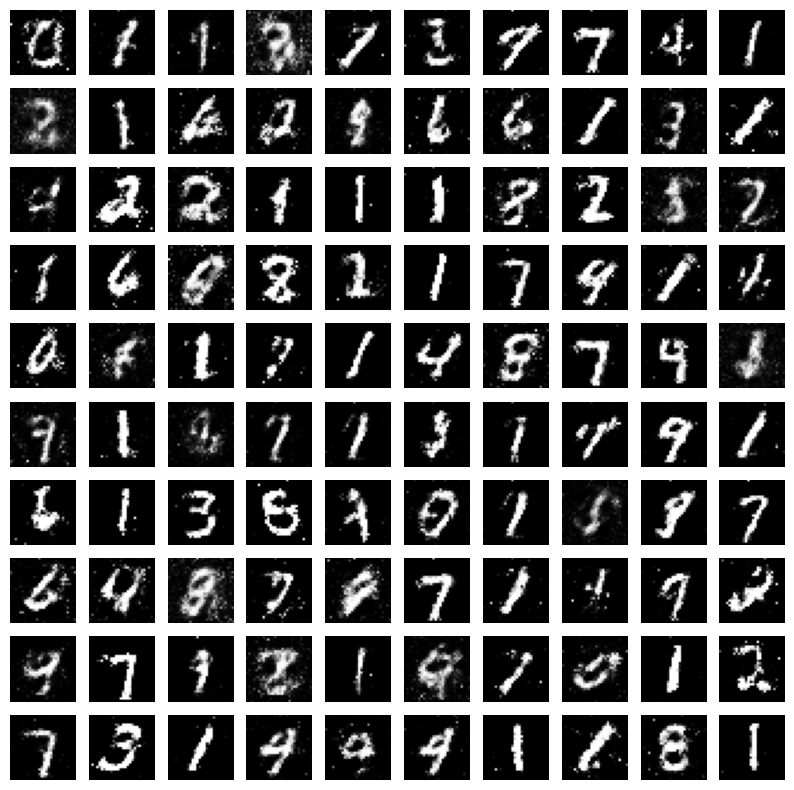

In [ ]:
netG.eval()
fig, axes = plt.subplots(10, 10, figsize=(10, 10))
with torch.no_grad():
    for i in range(10):
        for j in range(10):
            z = torch.randn(1, 100, device=device)
            # Reshape the output of the generator to a 2D image
            fake_image = netG(z).cpu().numpy().squeeze().reshape(28, 28)
            axes[i, j].imshow(fake_image, cmap='gray')
            axes[i, j].axis('off')
plt.show()

**1.7 Saving the model using Pickle package**

In [ ]:
# Save the generator model
with open(os.path.join(root, 'G.pkl'), 'wb') as f:
    pickle.dump(netG, f)

# Save the discriminator model
with open(os.path.join(root, 'D.pkl'), 'wb') as f:
    pickle.dump(netD, f)

### **2. Create and Annotate a Fake Dataset**

In [ ]:
from torchvision.utils import save_image

# Set the directory to save fake digit images and corresponding latent samples
fake_digits_dir = os.path.join(root, 'Fake_Digits')
os.makedirs(fake_digits_dir, exist_ok=True)

# Set the number of fake digit images to generate
num_fake_images = 100
nz = 100

# Generate random latent samples Z
Z = torch.randn(num_fake_images, nz, 1, 1, device=device)

# Generate fake digit images using the generator netG
with torch.no_grad():
    # Reshape Z to match the expected input shape of the generator
    Z_reshaped = Z.view(num_fake_images, -1)
    fake_images = netG(Z_reshaped).detach().cpu()

# Filter out well-formed digits
filtered_images = []
for i, image in enumerate(fake_images):
    filtered_images.append(image)

for i, (image, z) in enumerate(zip(filtered_images, Z)):
    # Reshape the image to (channels, height, width) before saving
    image = image.view(1, 28, 28)  # Assuming the images are single-channel (grayscale)

    # Generate a random label for the fake digit
    fake_label = torch.randint(0, 10, (1,)).item()

    # Save the image with the label in the filename
    image_filename = os.path.join(fake_digits_dir, f'fake_digit_label_{fake_label}_{i:03d}.png')
    save_image(image, image_filename)

    # Save the corresponding latent sample Z to a text file
    z_filename = os.path.join(fake_digits_dir, f'latent_sample_label_{fake_label}_{i:03d}.txt')
    with open(z_filename, 'w') as f:
        f.write(' '.join(str(val.item()) for val in z.squeeze()))

print(f'{num_fake_images} fake digit images and corresponding latent samples saved to {fake_digits_dir}')


100 fake digit images and corresponding latent samples saved to /content/drive/My Drive/AML_Assignment_GAN/MNIST/Fake_Digits


## **3. Evaluate the New Fake Dataset**

**3.1 Defining classifier**

In [ ]:
class CNNClassifier(nn.Module):
    def __init__(self):
        super(CNNClassifier, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)  # Output size is 10 for 10 classes (digits 0-9)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = x.view(-1, 64 * 7 * 7)  # Reshape for fully connected layer
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x


**3.2 Training the classifier**


In [ ]:
import torchvision
import torchvision.transforms as transforms
# Define the transform to normalize the data
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize images with mean and standard deviation
])

# Load the MNIST training dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Instantiate the classifier
classifier = CNNClassifier()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(classifier.parameters(), lr=0.001)

num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0
    classifier.train()  # Set the model to training mode
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = classifier(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        if i % 100 == 99:  # Print every 100 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

    # Print training accuracy for the epoch
    training_accuracy = 100 * correct / total
    print('Epoch [%d] Training Accuracy: %.2f%%' % (epoch + 1, training_accuracy))

print('Training finished')
# Load the MNIST test dataset and create a DataLoader
testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)
# Testing loop
classifier.eval()  # Set the model to evaluation mode
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = classifier(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Print testing accuracy
testing_accuracy = 100 * correct / total
print('Testing Accuracy: %.2f%%' % testing_accuracy)

# Save the classifier model
with open(os.path.join(root, 'C.pkl'), 'wb') as f:
    pickle.dump(classifier, f)

[1,   100] loss: 0.672
[1,   200] loss: 0.174
[1,   300] loss: 0.121
[1,   400] loss: 0.099
[1,   500] loss: 0.083
[1,   600] loss: 0.076
[1,   700] loss: 0.066
[1,   800] loss: 0.059
[1,   900] loss: 0.060
Epoch [1] Training Accuracy: 95.38%
[2,   100] loss: 0.046
[2,   200] loss: 0.045
[2,   300] loss: 0.040
[2,   400] loss: 0.036
[2,   500] loss: 0.044
[2,   600] loss: 0.045
[2,   700] loss: 0.043
[2,   800] loss: 0.055
[2,   900] loss: 0.044
Epoch [2] Training Accuracy: 98.62%
[3,   100] loss: 0.023
[3,   200] loss: 0.028
[3,   300] loss: 0.031
[3,   400] loss: 0.028
[3,   500] loss: 0.027
[3,   600] loss: 0.032
[3,   700] loss: 0.027
[3,   800] loss: 0.034
[3,   900] loss: 0.034
Epoch [3] Training Accuracy: 99.09%
[4,   100] loss: 0.020
[4,   200] loss: 0.021
[4,   300] loss: 0.022
[4,   400] loss: 0.020
[4,   500] loss: 0.025
[4,   600] loss: 0.017
[4,   700] loss: 0.024
[4,   800] loss: 0.023
[4,   900] loss: 0.017
Epoch [4] Training Accuracy: 99.36%
[5,   100] loss: 0.012
[5,  

**3.3 Evaluation for S0 and S1**

In [ ]:
# Define the transform to normalize the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)), # Normalize images with mean and standard deviation
    transforms.Grayscale(num_output_channels=1) # Add this line to convert images to grayscale
])

# Load the MNIST test dataset (S0)
testset_S0 = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader_S0 = DataLoader(testset_S0, batch_size=64, shuffle=False)

# Load the generated fake dataset (S1)
fake_digits_dir = 'Fake_Digits'

# Create a subdirectory for the fake digit class
fake_class_dir = os.path.join(fake_digits_dir, 'fake_digits')  # Create a subdirectory for the class
os.makedirs(fake_class_dir, exist_ok=True)

# Move the generated images into the subdirectory
for filename in os.listdir(fake_digits_dir):
    if filename.endswith('.png'):
        src_path = os.path.join(fake_digits_dir, filename)
        dst_path = os.path.join(fake_class_dir, filename)
        os.rename(src_path, dst_path)

testset_S1 = datasets.ImageFolder(root=fake_digits_dir, transform=transform)
testloader_S1 = DataLoader(testset_S1, batch_size=64, shuffle=False)

# Define function to evaluate the classifier
def evaluate_classifier(classifier, dataloader):
    classifier.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in dataloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = classifier(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct
    return accuracy
###
# Evaluate the classifier on the real MNIST test set (S0)
#accuracy_S0 = evaluate_classifier(classifier, testloader_S0)
#print('Accuracy on real MNIST test set (S0): %.2f%%' % accuracy_S0)

# Evaluate the classifier on the generated fake dataset (S1)
#accuracy_S1 = evaluate_classifier(classifier, testloader_S1)
#print('Accuracy on generated fake dataset (S1): %.2f%%' % accuracy_S1)

# Calculate classification errors
error_S0 = accuracy_S0
error_S1 = accuracy_S1

print('Classification error on real MNIST test set (S0): %.2f' %error_S0)
print('Classification error on generated fake dataset (S1): %.2f' %error_S1)



Classification error on real MNIST test set (S0): 9910.00
Classification error on generated fake dataset (S1): 0.00
